# M6 - W8 - Assignment: MNIST Deep learning for Handwriting Numbers

Deep learning is a subfield of machine learning, growing in popularity and power. The combination of large amount of available unstructured data (images, text, video, audio) and computing power enabled the development and flourishing of deep learning. Nowadays, it is used to solve complex problems and automate tasks, which are too time consuming for humans.

The MNIST dataset is a very famous dataset used to test and benchmark new deep learning architectures and models. It contains images of handwritten digits (from 0 to 9). It consists of a training and test sets of features and labels.
The mnist_train.csv file contains the 60,000 training examples and labels. The mnist_test.csv contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).


- __Question 1:__ Your first task is to use Keras and develop a model that correctly detects a handwritten digit. Though you can technically solve that task with any type of a supervised model, please use neural networks. You are free to experiment with the architecture of the model. Note that this is a multi-class classification task. 
- __Question 2:__ Please evaluate your model properly and interpret its performance.
- __Question 3:__ Submit your solution in a Jupyter notebook and a link to a GitHub repo where you have also uploaded your code.


In [98]:
# First things first, let's import the necessary packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import keras
import tensorflow as tf

# import of layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical


# Old imports:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier # might not needed since we dont have categorical values
# from sklearn.metrics import precision_recall_fscore_support, fbeta_score, make_scorer, classification_report, confusion_matrix

____
### Question 1: Use Keras and develop a model that correctly detects a handwritten digit
#### 1.1: Setup the data structure and inspect the data

In [2]:
# Let's first import the csv and take a look at it
df = pd.read_csv("mnist_train.csv")

In [3]:
# Split the data into a target and "predictors"
target = to_categorical(df["label"])
target_column = df["label"]
predictors = df.iloc[:,1:] #.values()
predictors

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


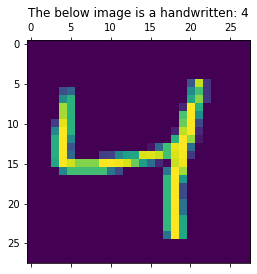

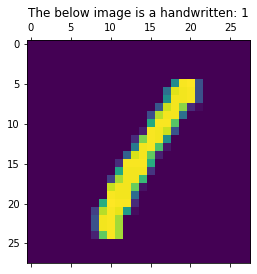

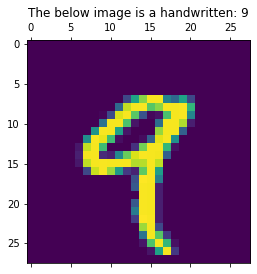

In [4]:
# Let's visualize the labels and retransform the columsn to pictures

for i in list(range(2,5)):
    # Initialize lists and counter
    nested_list = []
    batch = []
    j = 0
    
    # Run through the columns and store every batch of 28 numbers per row
    for column in predictors.iloc[i,:]:
        batch.append(column)
        j += 1
        if j == 28:
            nested_list.append(batch)
            j = 0
            batch = []
    
    # Visualize and title
    plt.matshow(nested_list)
    title = "The below image is a handwritten: "
    plt.title(title + str(target_column[i]))

#### 1.2: Specify architecture

In [5]:
# Set up the model: model
model = Sequential()

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
n_rows = predictors.shape[0]

# Add the first layer
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(100, activation='relu'))

# Add the second layer
model.add(Dense(100, activation='relu'))

# Add the output layer
model.add(Dense(10, activation = "softmax"))

#### 1.3: Compile the model

In [6]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: categorical_crossentropy


#### 1.4: Fit & Save/Store Model

In [7]:
# Fit the model
model_outcome = model.fit(predictors, target, epochs = 40, validation_split = 0.2)
model_outcome

Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1809 - accuracy: 0.8519 - val_loss: 0.3648 - val_accuracy: 0.9084
Epoch 2/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2806 - accuracy: 0.9265 - val_loss: 0.2389 - val_accuracy: 0.9383
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1995 - accuracy: 0.9435 - val_loss: 0.2517 - val_accuracy: 0.9317
Epoch 4/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1673 - accuracy: 0.9524 - val_loss: 0.2092 - val_accuracy: 0.9454
Epoch 5/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1452 - accuracy: 0.9586 - val_loss: 0.1544 - val_accuracy: 0.9571
Epoch 6/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1230 - accuracy: 0.9654 - val_loss: 0.1733 - val_accuracy: 0.9573
Epoch 7/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1099 - accuracy: 0.9675 - val_loss: 0.1810 - val_accuracy:

In [8]:
# Let's build a second model with a little different parameters and layers

img_rows, img_cols = 28, 28 
input_shape = (img_rows, img_cols)

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]


# Set up the model: model
model_alt = Sequential()

# Add the first layer
#model_alt.add(Conv2D(32, kernel_size = 1, activation = 'relu', input_shape = (n_rows,28,28)))

# Add the second layer
#model_alt.add(Conv2D(64, kernel_size = 1, activation = 'relu'))

# Add another layer
# model_alt.add(MaxPooling2D(pool_size = (1, 3)))

# Add another layer
#model_alt.add(Dropout(0.25)) 

# Add another layer
#model_alt.add(Flatten())

# Add another layer
model_alt.add(Dense(128, activation = 'relu')) 

# Add another layer
model_alt.add(Dropout(0.5)) 

# Add the output layer
model_alt.add(Dense(10, activation = 'softmax'))

# Compile the model
model_alt.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
# Let's reshape the training data to a 4D-Vector
predictors_reshaped = predictors.copy()
predictors_reshaped = predictors_reshaped.values.reshape(60000, 784, 1)
#print(predictors_reshaped)

# Lets now fit the alternative model
model_alt_outcome = model_alt.fit(predictors, target, epochs = 40, validation_split = 0.2)
model_alt_outcome

Epoch 1/40
1500/1500 [==============================] - 2s 2ms/step - loss: 3.7834 - accuracy: 0.4595 - val_loss: 0.9680 - val_accuracy: 0.7084
Epoch 2/40
1500/1500 [==============================] - 2s 2ms/step - loss: 1.3254 - accuracy: 0.5781 - val_loss: 0.7743 - val_accuracy: 0.7865
Epoch 3/40
1500/1500 [==============================] - 2s 2ms/step - loss: 1.1315 - accuracy: 0.6480 - val_loss: 0.6554 - val_accuracy: 0.8190
Epoch 4/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.9952 - accuracy: 0.7104 - val_loss: 0.4642 - val_accuracy: 0.8945
Epoch 5/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8643 - accuracy: 0.7514 - val_loss: 0.4620 - val_accuracy: 0.8902
Epoch 6/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8073 - accuracy: 0.7749 - val_loss: 0.4727 - val_accuracy: 0.9062
Epoch 7/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7578 - accuracy: 0.7889 - val_loss: 0.3868 - val_accuracy:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_alt.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (32, 128)                 100480    
_________________________________________________________________
dropout (Dropout)            (32, 128)                 0         
_________________________________________________________________
dense_5 (Dense)              (32, 10)                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### 1.5: Predict the labels (handwritten numbers)

In [20]:
# Let's read in the test-data
df_test = pd.read_csv("mnist_test.csv")
target_test = df_test["label"]
predictors_test = df_test.iloc[:,1:]
predictors_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Let's confirm the correct shape of the test_data for the input
print("Shape of the test_data as input:",predictors_test.shape)

# Now let's use our model to predict the numbers based on the pixels (columns)
target_test_predicted = model.predict(predictors_test)

Shape of the test_data as input: (10000, 784)


In [86]:
# Nasty function to plot predicted outcome versus actual (visualized)
def pred_test(row):
    fig, (ax1) = plt.subplots(ncols=1, figsize=(2, 2))
    
    # Initialize
    global nested_list_test
    nested_list_test = []
    batch = []
    j = 0
    
    # Run through the columns and store every batch of 28 numbers per row
    for column in predictors_test.iloc[row,:]:
        batch.append(column)
        j += 1
        if j == 28:
            nested_list_test.append(batch)
            j = 0
            batch = []

    
    ax1.matshow(nested_list_test, interpolation=None, aspect='auto')
    ax1.set_title('________________________\n\n Predicted number: ' + str(np.argmax(target_test_predicted[row])) + '\n\n Actual Number:')
    plt.axis('off')
    return nested_list_test

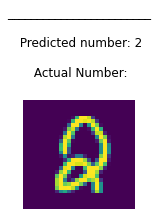

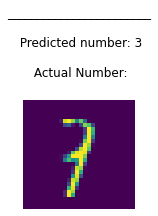

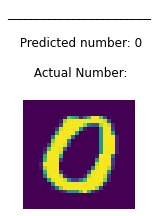

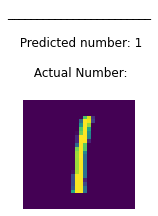

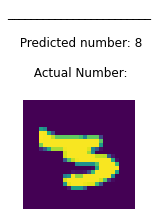

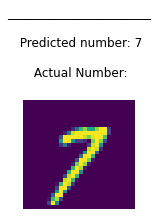

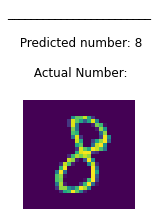

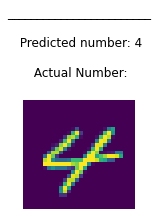

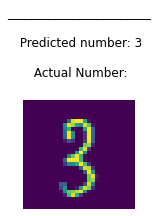

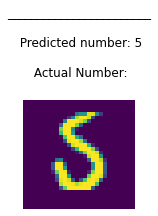

In [91]:
# Testing 10 random columns
y_pred_list = range(0, len(target_test_predicted))
random.seed(2)
for i in random.sample(y_pred_list, 10):
    pred_test(i)

In [ ]:
# Let's take one more look at the relations between labels with a Confusion Matrix
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

____
### Question 2: Please evaluate your model properly and interpret its performance

In [13]:
# Function to compare performance of two models
def model_compare_plot(model_1, model_2):
    fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 7))
    axs[0, 0].plot(model_1.history['loss'], 'r', model_2.history['loss'], 'b')
    axs[0, 0].set_title('Loss')
    axs[0, 0].legend(('Model 1', 'Model 2'))
    axs[0, 1].plot(model_1.history['accuracy'], 'r', model_2.history['accuracy'], 'b')
    axs[0, 1].legend(('Model 1', 'Model 2'))
    axs[0, 1].set_title('Accuracy')
    axs[1, 0].plot(model_1.history['val_loss'], 'r', model_2.history['val_loss'], 'b')
    axs[1, 0].set_title('Validation Loss')
    axs[1, 0].legend(('Model 1', 'Model 2'))
    axs[1, 1].plot(model_1.history['val_accuracy'], 'r', model_2.history['val_accuracy'], 'b')
    axs[1, 1].set_title('Validation Accuracy')
    axs[1, 1].legend(('Model 1', 'Model 2'))

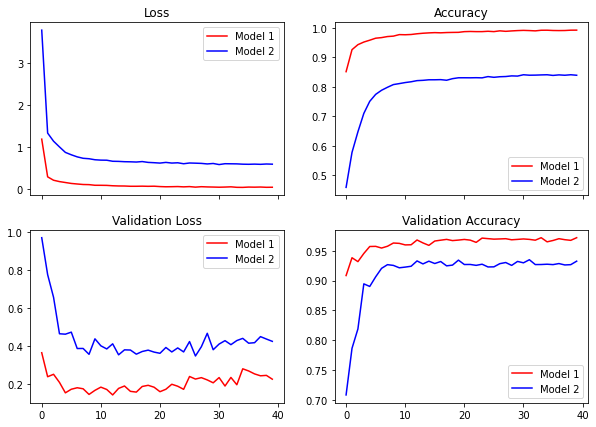

In [14]:
# Let's compare our models in terms of accuracy and loss in the training and test-data
model_compare_plot(model_outcome, model_alt_outcome)

Evaluation of the models:
- Model 1 with less loss and higher accuracy compared to Model 2
- Optimal epochs in regards to loss in the validation/test data seems to be around 10
- Would love to compare a third Model with convulotional layers

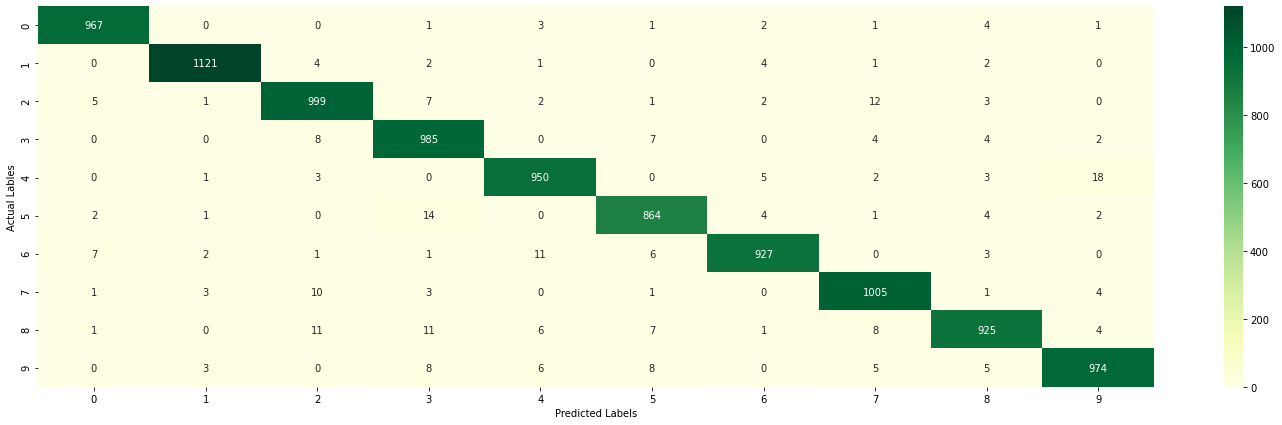

In [96]:
# Prep confusion matrix
y_pred_labels = [np.argmax(i) for i in target_test_predicted]
cm = tf.math.confusion_matrix(labels=target_test, predictions=y_pred_labels)

# Visualize confusion matrix
plt.figure(figsize = (25,7))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGn")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Lables')
plt.show()

Few notes on the confusion matrix:
- 4 often gets confused for the 9
- 5 often gets confused for the 3

____
### Question 2: Submit your solution in a Jupyter notebook and a link to a GitHub repo where you have also uploaded your code

In [117]:
# done

_____________
_____________
### BACKUP

In [15]:
# Let's save and reload the model
model.save("model_handwriting_classification.h5")
my_model = load_model("model_handwriting_classification.h5")

# Let's now predict with the test-data
predictions = my_model.predict(predictors_test)
probability_true = predictions[:,1]

In [114]:
def int2float_grey(x):
    x = x / 255
    return x

In [115]:
y_train = np.array(df.iloc[:, 0])
x_train = np.array(df.iloc[:, 1:])

x_train = int2float_grey(x_train)


y_train = keras.utils.to_categorical(y_train, num_classes=10)

model_name = "Kaggle-Import"
model_kaggle = Sequential()
model_kaggle.add(Reshape(target_shape=(1, 28, 28), input_shape=(784,)))
model_kaggle.add(Conv2D(kernel_size=(3, 3), filters=6, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model_kaggle.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model_kaggle.add(Conv2D(kernel_size=(5, 5), filters=16, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model_kaggle.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model_kaggle.add(Conv2D(kernel_size=(5, 5), filters=120, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model_kaggle.add(Flatten())
model_kaggle.add(Dense(120, activation='relu'))
model_kaggle.add(Dense(120, activation='relu'))
model_kaggle.add(Dense(10, activation='softmax'))

In [116]:
adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_kaggle.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model_kaggle_output = model_kaggle.fit(x_train, y_train, epochs=30, batch_size=64)
model_kaggle_output

Epoch 1/30


InvalidArgumentError:  Default MaxPoolingOp only supports NHWC on device type CPU
	 [[node sequential_13/max_pooling2d_17/MaxPool (defined at <ipython-input-116-cb93f18be3bf>:4) ]] [Op:__inference_train_function_308574]

Function call stack:
train_function
